In [2]:
# Importing Required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
# Reading the Insurance Dataset direct from github. 
# Link to view in Raw form: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
# View the first five Column. 
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Information about the data and features datatype in the dataframe.
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# In the dataframe, there are categorical variable. We can solve this problem by the method called - One Hot Encoding.
insurance_one_hot = pd.get_dummies(insurance_data)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [7]:
# Creating the X and Y for training and testing.
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [8]:
# Viewing the X data
X.head() 

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [9]:
# Viewing the y data
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [10]:
# Creating training and test dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

# Try a Model

In [11]:
# Manually build a network.
#set random seed.
tf.random.set_seed(42)

# Create a model.
insurance_model = tf.keras.Sequential([tf.keras.layers.Dense(10),tf.keras.layers.Dense(5),tf.keras.layers.Dense(3),tf.keras.layers.Dense(2),tf.keras.layers.Dense(1)])

# Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13322.5176 - mae: 13322.5176
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13300.2764 - mae: 13300.2764
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13257.6904 - mae: 13257.6904
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13169.6074 - mae: 13169.6074
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 12984.1143 - mae: 12984.1143
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 12608.4082 - mae: 12608.4082
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 11903.2295 - mae: 11903.2295
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 10732.0693 - mae: 10732.0693
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 9226.0410 - mae: 9226.0410
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7918.7393 

In [12]:
# Check the model summary
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 204
Trainable params: 204
Non-trainable params: 0
_________________________________________________________________


In [13]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6009.1719 - mae: 6009.1719


[6009.171875, 6009.171875]

In [14]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

# Now, let's try to improve our model.


1.   Try to add extra nodes.
2.   Try to add extra layer.
3.   Train for longer.



In [15]:
# set random seed.
tf.random.set_seed(42)

# Create the model.
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(25),
  tf.keras.layers.Dense(12),
  tf.keras.layers.Dense(6),
  tf.keras.layers.Dense(3),
  tf.keras.layers.Dense(2),
  tf.keras.layers.Dense(1)
])

# Compile the model.
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                          metrics = ["mae"])

# Fit the model.
history = insurance_model_2.fit(X_train, y_train, epochs = 200, verbose = 1)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13284.2939 - mae: 13284.2939
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 11509.9854 - mae: 11509.9854
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7490.5112 - mae: 7490.5112
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7314.7617 - mae: 7314.7617
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7232.9731 - mae: 7232.9731
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7124.5864 - mae: 7124.5864
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7003.8281 - mae: 7003.8281
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6861.8672 - mae: 6861.8672
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6720.6060 - mae: 6720.6060
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6624.3857 - mae: 6624.

In [16]:
# Check the model summary
insurance_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_8 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

In [17]:
# Evaluate the model_2
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3168.3882 - mae: 3168.3882


[3168.38818359375, 3168.38818359375]

In [18]:
# Compare the two models.Checking for model.
insurance_model.evaluate(X_test, y_test) 

9/9 [==============================] - 0s 2ms/step - loss: 6009.1719 - mae: 6009.1719


[6009.171875, 6009.171875]

Text(0.5, 0, 'Epochs')

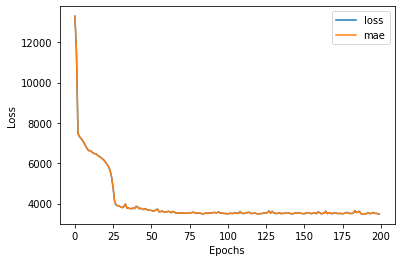

In [19]:
# Plot. (Also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

# Preprocessing data (Standardization and Normalization)

**How long we should train for?**

TesnorFlow has a solution. It's called [ EarlyStopping callback (see the documentation), which is a TensorFlow component we can add to our model to stop training training once it stops improving a certain metric.] 

In [20]:
# Read again the csv.
insurance_data_1 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_data_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f421c045850>,
      dtype=object)

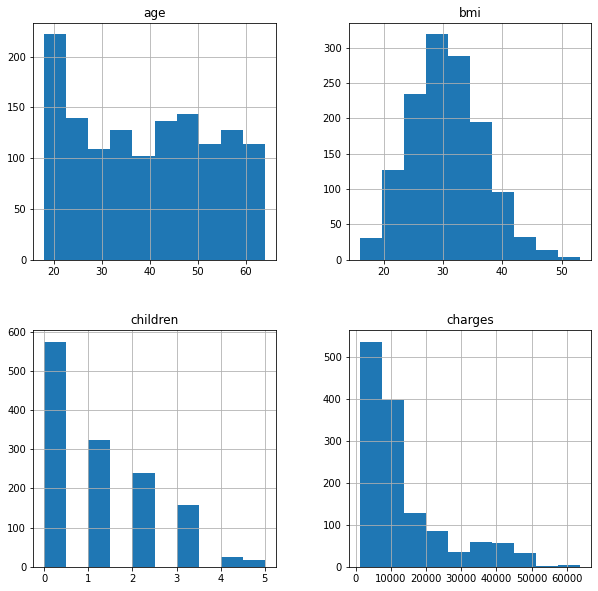

In [21]:
# Plot the histogram of total dataset.
insurance_data_1.hist(figsize= (10,10)) ## plot the histogram for all except the categorical variables.

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column Transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Trun all values in these coolumns between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance_data_1.drop("charges", axis = 1)
y = insurance_data_1["charges"]

# Build training and test dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the column transformer to our training data
ct.fit(X_train1)

# transforming our training data and test data with normalization and OneHotEncoder
X_train_norm = ct.transform(X_train1)
X_test_norm = ct.transform(X_test1)

In [23]:
# Compare between X_train1 and X_train_norm.
X_train1.loc[0], X_train_norm[0]     # X_train1 is a dataframe and X_train_norm is a numpy array.
                                     
#type(X_train1), type(X_train_norm)  # we can check the type by type()

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [28]:
# Building another Neural Network to fit the normalized data.
tf.random.set_seed(42)

# Creating the model architecture. Here, We will build the third model.
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

# Compile the model.
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# Now, fit the model
history1 = insurance_model_3.fit(X_train_norm, y_train1, epochs = 200, verbose = 2)

Epoch 1/200
34/34 - 0s - loss: 13339.6016 - mae: 13339.6016
Epoch 2/200
34/34 - 0s - loss: 13253.4756 - mae: 13253.4756
Epoch 3/200
34/34 - 0s - loss: 12617.2588 - mae: 12617.2588
Epoch 4/200
34/34 - 0s - loss: 10207.0557 - mae: 10207.0557
Epoch 5/200
34/34 - 0s - loss: 8069.6953 - mae: 8069.6953
Epoch 6/200
34/34 - 0s - loss: 7782.2192 - mae: 7782.2192
Epoch 7/200
34/34 - 0s - loss: 7554.2222 - mae: 7554.2222
Epoch 8/200
34/34 - 0s - loss: 7325.5615 - mae: 7325.5615
Epoch 9/200
34/34 - 0s - loss: 7065.1851 - mae: 7065.1851
Epoch 10/200
34/34 - 0s - loss: 6745.0908 - mae: 6745.0908
Epoch 11/200
34/34 - 0s - loss: 6348.0117 - mae: 6348.0117
Epoch 12/200
34/34 - 0s - loss: 5800.2993 - mae: 5800.2993
Epoch 13/200
34/34 - 0s - loss: 5073.0166 - mae: 5073.0166
Epoch 14/200
34/34 - 0s - loss: 4278.0386 - mae: 4278.0386
Epoch 15/200
34/34 - 0s - loss: 3766.4561 - mae: 3766.4561
Epoch 16/200
34/34 - 0s - loss: 3660.5322 - mae: 3660.5322
Epoch 17/200
34/34 - 0s - loss: 3648.4514 - mae: 3648.451

In [29]:
insurance_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_20 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 7,381
Trainable params: 7,381
Non-trainable params: 0
_________________________________________________________________


In [30]:
insurance_model_3.evaluate(X_test_norm, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3168.7322 - mae: 3168.7322


[3168.732177734375, 3168.732177734375]

Text(0.5, 0, 'Epochs')

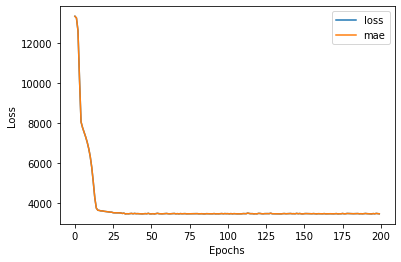

In [31]:
# Plot. (Also known as a loss curve or training curve)
pd.DataFrame(history1.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

# Model Architecture.

**See the different Model architecture.**

Evaluation on different model

In [32]:
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 204
Trainable params: 204
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Evaluate the first model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6009.1719 - mae: 6009.1719


[6009.171875, 6009.171875]

In [33]:
insurance_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_8 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

In [35]:
# Evaluate the model_2
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3168.3882 - mae: 3168.3882


[3168.38818359375, 3168.38818359375]

In [34]:
insurance_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_20 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 7,381
Trainable params: 7,381
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Evaluate the third model
insurance_model_3.evaluate(X_test_norm, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3168.7322 - mae: 3168.7322


[3168.732177734375, 3168.732177734375]